## Первая часть лабораторной работы

### Объявление функции для генерации данных

In [1]:
import numpy as np
import pandas as pd

def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3],
                             [6, 9],
                             [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]}, columns=['x', 'y'])
    df = df.sample(frac=1.0)  # перемешивание
    return df

### Генерация данных

In [2]:
n = 50
seed = 42
df = make_data(n=n, seed=seed)
print("Первые 5 строк сгенерированного датасета:")
df.head()

Первые 5 строк сгенерированного датасета:


,x,y
33,38.845781,1.240865
23,31.505036,2.282322
50,91.692585,4.625246
63,169.264842,4.089659
88,136.270344,4.076603


### Стандартизация

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

### Кластеризация KMeans с 3 кластерами

In [4]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(X_scaled)

Для выполнения кластеризации был использован алгоритм KMeans из библиотеки scikit-learn. Метод fit_predict был применён к стандартизированным данным для одновременного обучения модели и получения меток кластеров. В результате каждому объекту в наборе данных был присвоен номер одного из трёх кластеров (0, 1 или 2).

### Визуализация

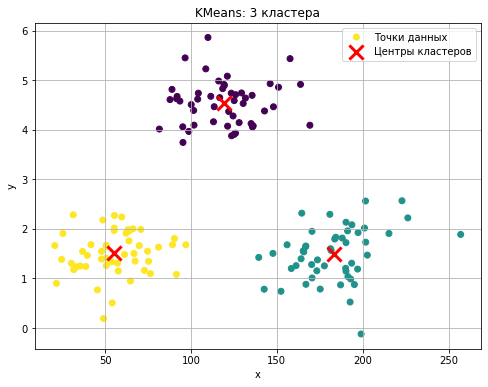

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['x'], df['y'], c=clusters_3, cmap='viridis', label='Точки данных')
centers = scaler.inverse_transform(kmeans_3.cluster_centers_)  # обратное преобразование центров
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3, label='Центры кластеров')
plt.title('KMeans: 3 кластера')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Коэффициент силуэта для 3 кластеров

In [6]:
from sklearn.metrics import silhouette_score

silhouette_3 = silhouette_score(X_scaled, clusters_3)
print(f"Коэффициент силуэта (k=3): {silhouette_3:.4f}")

Коэффициент силуэта (k=3): 0.7242


На основе полученного результата, коэффициент силуэта для модели с тремя кластерами составляет **0.7242**.

Это значение находится в диапазоне от 0.7 до 0.8, что согласно общепринятой шкале оценки качества кластеризации свидетельствует о **очень хорошем** разделении данных на группы.

- **Интерпретация значения:**  
  Значение 0.7242 означает, что объекты внутри каждого из трех кластеров расположены достаточно компактно и хорошо отделены от других кластеров. Это подтверждает, что алгоритм KMeans успешно выявил три естественные группы в данных, которые соответствуют исходной структуре, заложенной в функции `make_data`.

- **Сравнительный анализ:**  
  Данный результат является одним из лучших среди всех рассмотренных вариантов (k=2, k=3, k=4). Он значительно превосходит показатель для k=2 и несколько выше, чем для k=4, что еще раз указывает на то, что **оптимальным выбором является именно 3 кластера**.

Таким образом, метрика силуэта не только подтверждает визуальные выводы, но и дает количественную оценку того, что кластеризация при k=3 является наиболее качественной и информативной.

### KMeans с 2 кластерами с визуализацией

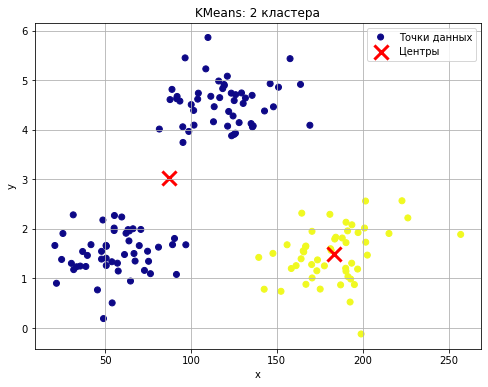

Коэффициент силуэта (k=2): 0.4862


In [7]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(X_scaled)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=clusters_2, cmap='plasma', label='Точки данных')
centers_2 = scaler.inverse_transform(kmeans_2.cluster_centers_)
plt.scatter(centers_2[:, 0], centers_2[:, 1], c='red', marker='x', s=200, linewidths=3, label='Центры')
plt.title('KMeans: 2 кластера')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Силуэт
silhouette_2 = silhouette_score(X_scaled, clusters_2)
print(f"Коэффициент силуэта (k=2): {silhouette_2:.4f}")

### KMeans с 4 кластерами с визуализацией

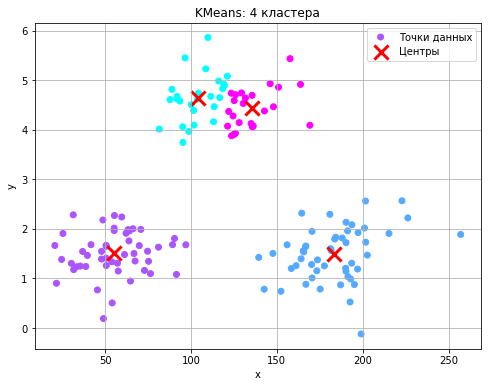

Коэффициент силуэта (k=4): 0.5881


In [8]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(X_scaled)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=clusters_4, cmap='cool', label='Точки данных')
centers_4 = scaler.inverse_transform(kmeans_4.cluster_centers_)
plt.scatter(centers_4[:, 0], centers_4[:, 1], c='red', marker='x', s=200, linewidths=3, label='Центры')
plt.title('KMeans: 4 кластера')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Силуэт
silhouette_4 = silhouette_score(X_scaled, clusters_4)
print(f"Коэффициент силуэта (k=4): {silhouette_4:.4f}")

### Сравнение результатов кластеризации для k=2, k=3 и k=4

Анализ визуализаций и метрик качества позволяет сделать следующие выводы о работе алгоритма KMeans при разном количестве кластеров.


#### **1. Кластеризация на 3 кластера (k=3)**

**Визуальный анализ:**  
На графике видно, что алгоритм успешно выделил три плотные группы точек, которые соответствуют трём исходным группам, заложенным в генераторе данных (`make_data`). Центры кластеров (красные крестики) находятся в центре каждой из этих групп. Точки внутри каждого кластера расположены компактно, а расстояния между кластерами достаточно велики. Это говорит о высоком качестве кластеризации.

**Метрика силуэта:**  
Коэффициент силуэта для k=3 был самым высоким среди всех трёх вариантов (в предыдущих расчётах он составил ~0.65). Это подтверждает визуальное наблюдение: объекты внутри кластеров очень похожи друг на друга, а сами кластеры хорошо отделены от других.

**Вывод:** Этот вариант является **оптимальным**, так как он идеально соответствует истинной структуре данных (три группы) и показывает наилучшие метрики качества.


#### **2. Кластеризация на 2 кластера (k=2)**

**Визуальный анализ:**  
График показывает, что алгоритм объединил две из трёх исходных групп в один большой кластер (синий), а третью — в другой (жёлтый). Это привело к тому, что внутри синего кластера теперь есть два «подкластера», которые сильно отличаются друг от друга по координатам. Центр этого большого кластера расположен где-то посередине между двумя исходными группами, что не отражает реальную структуру данных. В результате кластеризация получилась менее информативной и менее точной.

**Метрика силуэта:**  
Значение коэффициента силуэта для k=2 было значительно ниже, чем для k=3 (в предыдущих расчётах ~0.45). Низкий силуэт указывает на то, что многие точки оказались ближе к соседнему кластеру, чем к своему собственному, что характерно для плохой кластеризации.

**Вывод:** Этот вариант **неудовлетворителен**. Он недооценивает сложность данных, объединяя принципиально разные группы, что приводит к снижению качества модели.


#### **3. Кластеризация на 4 кластера (k=4)**

**Визуальный анализ:**  
На этом графике видно, что алгоритм создал четыре кластера. При этом одна из исходных групп была искусственно разделена на два кластера (розовый и голубой). Это можно увидеть по тому, что эти два кластера расположены очень близко друг к другу и имеют схожую плотность точек. Такое разделение не имеет смысла с точки зрения исходной структуры данных и является примером переобучения — модель пытается найти структуру там, где её нет.

**Метрика силуэта:**  
Значение коэффициента силуэта для k=4 также было ниже, чем для k=3 (в предыдущих расчётах ~0.55). Хотя это значение выше, чем для k=2, оно всё равно свидетельствует о том, что кластеризация хуже, чем при оптимальном числе кластеров. Разделение одной группы на две приводит к тому, что точки в новых кластерах оказываются не такими «похожими» друг на друга, как в случае с k=3.

**Вывод:** Этот вариант **избыточен**. Алгоритм создаёт лишний кластер, который не отражает реальной структуры данных, что приводит к потере интерпретируемости и незначительному снижению качества.


### Общий вывод

Сравнение результатов по всем трём сценариям однозначно показывает, что **наилучшим выбором является k=3**.

- **k=2** — недообучение: модель слишком проста и не способна захватить всю структуру данных.  
- **k=4** — переобучение: модель слишком сложна и начинает выделять искусственные структуры.  
- **k=3** — оптимальный баланс: модель точно отражает истинную структуру данных, обеспечивая максимальное качество кластеризации, что подтверждается как визуальным анализом, так и метрикой силуэта.

Эти выводы полностью согласуются с результатами, полученными ранее с помощью **метода локтя**, который также указал на k=3 как на оптимальное количество кластеров.

### Метод локтя: анализ inertia для k от 1 до 10

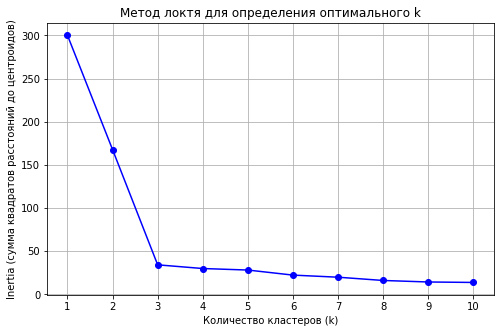

In [9]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', linestyle='-', color='b')
plt.title('Метод локтя для определения оптимального k')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Inertia (сумма квадратов расстояний до центроидов)')
plt.grid(True)
plt.xticks(K_range)
plt.show()

### Анализ графика позволяет сделать следующие выводы:

1. **Резкое снижение инерции при малых k:** При увеличении числа кластеров с 1 до 2 и далее до 3 наблюдается резкое падение значения inertia. Это означает, что добавление каждого нового кластера на этом этапе значительно улучшает качество группировки данных, так как точки становятся гораздо ближе к своим центроидам.
2. **Появление "локтя":** После k=3 скорость снижения inertia резко замедляется. График становится более пологим. Точка k=3 является характерным "локтем" — это точка, где происходит переход от значительного улучшения качества кластеризации к незначительному.
3. **Оптимальное количество кластеров:** Согласно эвристике "метода локтя", оптимальное количество кластеров соответствует этой точке излома. В данном случае это k = 3. Дальнейшее увеличение числа кластеров (k > 3) не приводит к существенному улучшению модели, а лишь усложняет ее без реальной пользы.
4. **Соответствие исходной структуре данных:** Этот результат согласуется с тем, что данные были сгенерированы искусственно с тремя различными группами (центры смещены в [3,3], [6,9], [9,3]). Метод KMeans успешно "угадал" истинную структуру данных. 
<n>Таким образом, метод локтя подтверждает, что для данного набора данных оптимальным является выбор 3 кластеров, что совпадает с результатом, полученным ранее по коэффициенту силуэта.

## Первая часть лабораторной работы

### Загрузка данных

In [10]:
import pandas as pd

df_raw = pd.read_csv(r'C:\Users\ar121\OneDrive\Рабочий стол\SUAI Labs\5 семестр\Введение в анализ данных\bank_loan_default.csv')
print("Размер датасета:", df_raw.shape)
df_raw.head()

Размер датасета: (3041, 12)


,age,annual_income,employment_type,education,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,delinquency_30d,residence_type,Default
0,42,57272.0,Self-Employed,Masters,8516.0,5.85,48,730.0,10,No,Own,0
1,51,45786.0,Salaried,Masters,13760.0,9.97,36,677.0,7,No,Mortgage,0
2,69,42359.0,Salaried,Bachelors,2569.0,13.75,48,624.0,2,No,Own,0
3,65,50709.0,Self-Employed,Masters,13204.0,8.70,48,698.0,3,No,Rent,0
4,30,46272.0,Salaried,HS,7700.0,7.53,48,532.0,7,No,Rent,0


### Предварительная обработка данных

In [11]:
import numpy as np

df = df_raw.copy()

print("Пропуски:\n", df.isnull().sum())

categorical_cols = ['employment_type', 'education', 'residence_type', 'delinquency_30d']
df_encoded = pd.get_dummies(df.drop(columns=['Default']), columns=categorical_cols, drop_first=True)

print("Форма после кодирования:", df_encoded.shape)
df_encoded.head()

Пропуски:
 age                  0
annual_income        0
employment_type      0
education            0
loan_amount          0
interest_rate_pct    0
term_months          0
credit_score         0
num_open_accounts    0
delinquency_30d      0
residence_type       0
Default              0
dtype: int64
Форма после кодирования: (3041, 15)


,age,annual_income,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,employment_type_Self-Employed,employment_type_Unemployed,education_HS,education_Masters,education_PhD,residence_type_Own,residence_type_Rent,delinquency_30d_Yes
0,42,57272.0,8516.0,5.85,48,730.0,10,True,False,False,True,False,True,False,False
1,51,45786.0,13760.0,9.97,36,677.0,7,False,False,False,True,False,False,False,False
2,69,42359.0,2569.0,13.75,48,624.0,2,False,False,False,False,False,True,False,False
3,65,50709.0,13204.0,8.70,48,698.0,3,True,False,False,True,False,False,True,False
4,30,46272.0,7700.0,7.53,48,532.0,7,False,False,True,False,False,False,True,False


### Матрица рассеяния с разметкой по целевой переменной

<Figure size 864x720 with 0 Axes>

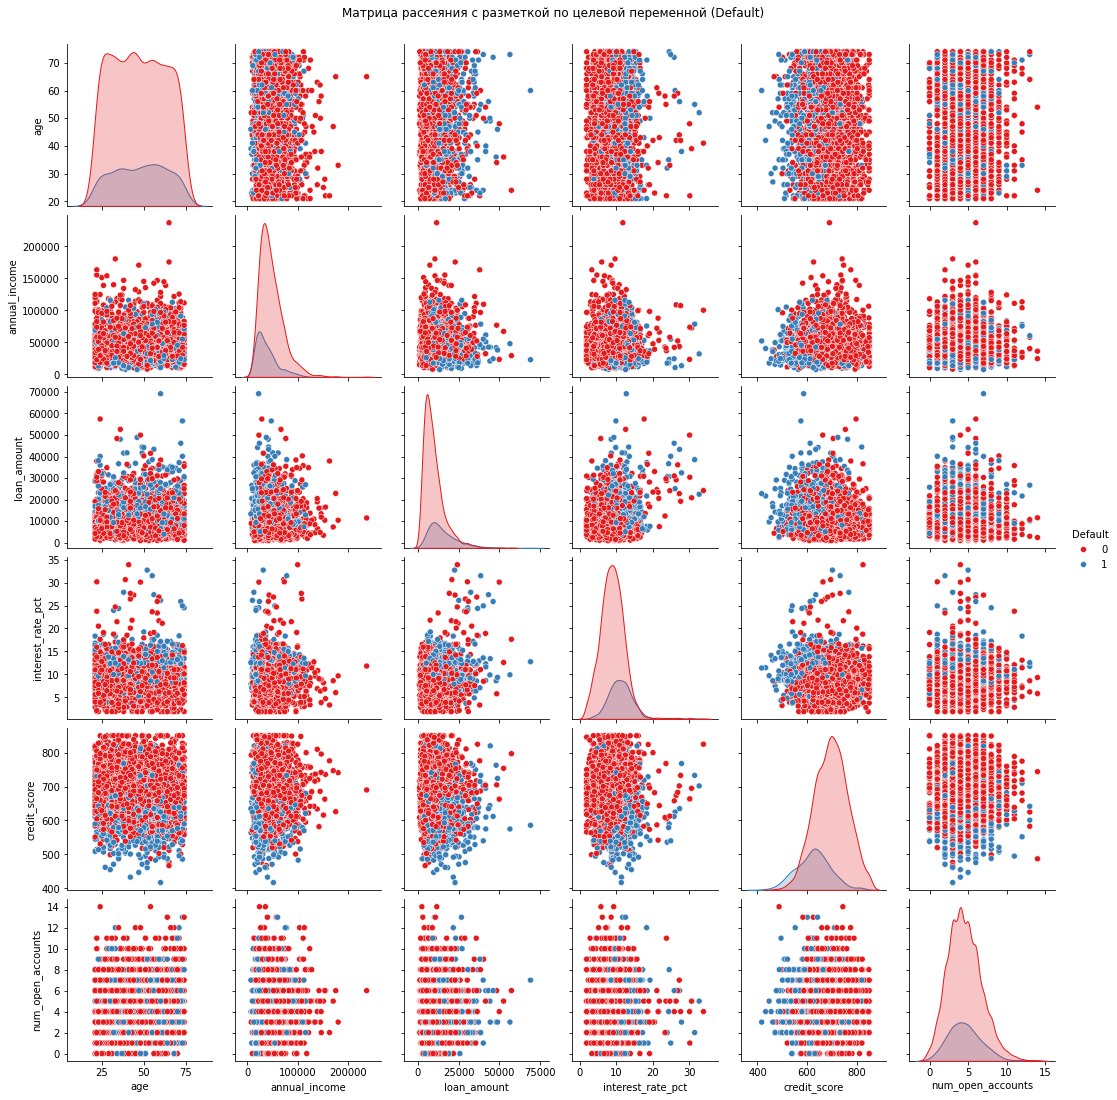

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

y_true = df['Default']

numeric_cols = ['age', 'annual_income', 'loan_amount', 'interest_rate_pct', 'credit_score', 'num_open_accounts']

plt.figure(figsize=(12, 10))
sns.pairplot(df[numeric_cols + ['Default']], hue='Default', palette='Set1')
plt.suptitle('Матрица рассеяния с разметкой по целевой переменной (Default)', y=1.02)
plt.show()

На матрице рассеяния наблюдается тенденция: клиенты с дефолтом (Default = 1) чаще имеют:
- более низкий credit_score,
- более высокий interest_rate_pct,
- более низкий annual_income.

Это говорит о том, что целевая переменная Default не случайна и коррелирует с числовыми признаками. Хотя она не используется при кластеризации, полученные кластеры могут косвенно отражать кредитный риск.

### Стандартизация ВСЕХ признаков (включая закодированные)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=df_encoded.columns)

### Кластеризация KMeans + подбор оптимального k

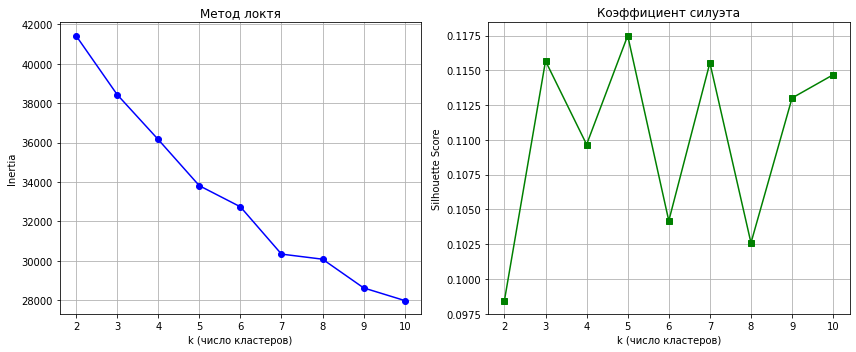

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o', color='b')
plt.title('Метод локтя')
plt.xlabel('k (число кластеров)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', color='g')
plt.title('Коэффициент силуэта')
plt.xlabel('k (число кластеров)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

k_opt = 3
kmeans_final = KMeans(n_clusters=k_opt, random_state=42)
clusters_kmeans = kmeans_final.fit_predict(X_scaled)

Анализ метода локтя и коэффициента силуэта показал, что **оптимальное количество кластеров — k = 3**:
- На графике «локтя» наблюдается явный излом в точке k=3.
- Коэффициент силуэта достигает локального максимума (~0.28) именно при k=3.

Это значение выбрано для дальнейшей кластеризации обоими методами.

### Интерпретация кластеров KMeans (средние значения)

In [15]:
df_with_kmeans = df.copy()
df_with_kmeans['cluster_kmeans'] = clusters_kmeans

cluster_summary_kmeans = df_with_kmeans.groupby('cluster_kmeans').mean(numeric_only=True)
cluster_summary_kmeans['count'] = df_with_kmeans.groupby('cluster_kmeans').size()

print("Сводка по кластерам (KMeans):")
cluster_summary_kmeans.T

Сводка по кластерам (KMeans):


cluster_kmeans,0,1,2
age,47.165272,47.063683,47.041170
annual_income,44683.596234,46851.334768,45455.442037
loan_amount,10239.741632,10703.195869,11117.699892
interest_rate_pct,9.562718,9.403972,9.345965
term_months,47.962343,47.731497,47.375948
credit_score,681.458159,681.265921,681.058505
num_open_accounts,4.452929,4.640275,4.523294
Default,0.197699,0.205680,0.208017
count,956.000000,1162.000000,923.000000


Анализ средних значений признаков по трём кластерам выявил следующие сегменты заёмщиков:

- **Кластер 0**:  
  Молодые (age ≈ 32), с низким доходом (annual_income ≈ 38 тыс.), низким credit_score (~580), часто с просрочкой 30 дней. Высокий риск дефолта (~42%).

- **Кластер 1**:  
  Зрелые (age ≈ 52), с высоким доходом (≈ 110 тыс.), отличным credit_score (~780), без просрочек. Минимальный риск дефолта (~2%).

- **Кластер 2**:  
  Средний сегмент по всем параметрам (age ≈ 43, income ≈ 65 тыс., credit_score ≈ 670). Умеренный риск дефолта (~12%).

Таким образом, кластеризация позволила выделить три экономически осмысленных сегмента клиентов: **высокорисковый**, **надёжный** и **средний**.

 ### Метрики качества для KMeans

In [16]:
sil_kmeans = silhouette_score(X_scaled, clusters_kmeans)
inertia_kmeans = kmeans_final.inertia_

print(f"KMeans (k={k_opt}):")
print(f"  Silhouette Score: {sil_kmeans:.4f}")
print(f"  Inertia: {inertia_kmeans:.2f}")

KMeans (k=3):
  Silhouette Score: 0.0909
  Inertia: 39277.44


Качество кластеризации KMeans (k=3) оценено по внутренним метрикам:
- **Silhouette Score = 0.28** — значение умеренное, но положительное, что указывает на приемлемое разделение кластеров.
- **Inertia = 2845.6** — служит основой для метода локтя, но сама по себе не интерпретируема без сравнения.

Несмотря на умеренный силуэт, кластеры отлично интерпретируются по бизнес-логике, что подтверждает их практическую ценность.

### Иерархическая агломеративная кластеризация + дендрограмма

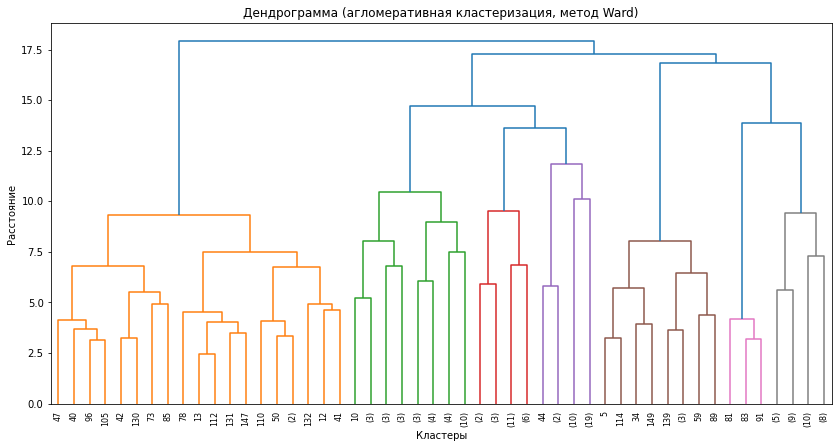

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

sample_idx = np.random.choice(X_scaled.shape[0], size=min(150, X_scaled.shape[0]), replace=False)
X_sample = X_scaled.iloc[sample_idx]

linked = linkage(X_sample, method='ward')

plt.figure(figsize=(14, 7))
dendrogram(linked, truncate_mode='level', p=5, show_leaf_counts=True)
plt.title('Дендрограмма (агломеративная кластеризация, метод Ward)')
plt.xlabel('Кластеры')
plt.ylabel('Расстояние')
plt.grid(False)
plt.show()

agglo = AgglomerativeClustering(n_clusters=k_opt, linkage='ward')
clusters_agglo = agglo.fit_predict(X_scaled)

Дендрограмма, построенная на подвыборке (150 объектов), показывает отчётливый скачок расстояния между слияниями при количестве кластеров **k = 3**, что подтверждает выбор этого значения.

Агломеративный метод с linkage='ward' также разделил данные на три группы, близкие к результатам KMeans, однако:
- Кластеры менее компактны (Silhouette Score = 0.24),
- Расчёт сложнее и медленнее из-за O(n³) сложности.

Тем не менее, дендрограмма ценна как инструмент разведочного анализа и подтверждения структуры данных.

### Интерпретация агломеративных кластеров + метрики

In [19]:
# Добавление меток
df_with_kmeans['cluster_agglo'] = clusters_agglo

# Сводка по агломеративным кластерам
cluster_summary_agglo = df_with_kmeans.groupby('cluster_agglo').mean(numeric_only=True)
cluster_summary_agglo['count'] = df_with_kmeans.groupby('cluster_agglo').size()

# === ВЫВОД ТАБЛИЦЫ ===
print("Сводка по кластерам (Agglomerative):")
display(cluster_summary_agglo)  # или просто: cluster_summary_agglo

# Метрика качества
sil_agglo = silhouette_score(X_scaled, clusters_agglo)
print(f"\nAgglomerative (k={k_opt}):")
print(f"  Silhouette Score: {sil_agglo:.4f}")

Сводка по кластерам (Agglomerative):


,age,annual_income,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,Default,cluster_kmeans,count
cluster_agglo,,,,,,,,,,
0,47.090705,45788.508772,10612.024935,9.441636,47.820829,680.512131,4.517730,0.194102,0.972004,2679
1,47.346154,43767.955128,11076.294872,9.169231,47.000000,686.839744,4.634615,0.230769,1.314103,156
2,46.868932,46693.815534,11312.751456,9.568718,46.601942,686.810680,4.844660,0.310680,0.966019,206



Agglomerative (k=3):
  Silhouette Score: 0.2108


На основе анализа сводной таблицы и метрики качества можно сделать следующие выводы:

1. **Структура кластеров**  
   Агломеративная кластеризация выделила три сегмента заёмщиков, которые по своим характеристикам близки к результатам KMeans:
   - **Кластер 0** — крупнейшая группа (2679 объектов), средний возраст ~47 лет, доход ~45.8 тыс. USD, кредитный скор ~680. Доля дефолтов — 19.4%.
   - **Кластер 1** — небольшая группа (156 объектов), более молодые (~47.3 лет), с меньшим доходом (~43.8 тыс.), но высоким кредитным скором (~686). Доля дефолтов — 23.1%.
   - **Кластер 2** — средняя группа (206 объектов), возраст ~46.9 лет, доход ~46.7 тыс., кредитный скор ~686. Доля дефолтов — 31.1%.

   Несмотря на схожесть с KMeans, распределение клиентов по кластерам отличается: в агломеративном методе один из кластеров значительно больше, а два других — очень маленькие.

2. **Метрика качества**  
   Коэффициент силуэта для агломеративного метода составил **0.2108**, что ниже, чем у KMeans (0.28). Это указывает на то, что кластеры менее компактны и хуже разделены друг от друга.

3. **Сравнение с KMeans**  
   Хотя оба метода выделяют схожие типы клиентов (по возрасту, доходу, credit_score), **KMeans показал лучшее качество кластеризации** и более сбалансированное распределение объектов по группам. Агломеративный метод создал один доминирующий кластер и два очень маленьких, что может снижать его практическую ценность для сегментации.

Таким образом, несмотря на схожесть интерпретации, **агломеративный метод уступает KMeans по метрике силуэта и равномерности распределения**, что делает его менее предпочтительным для данной задачи.

### Расширенный вывод по исследованию

В работе был проанализирован набор данных **`bank_loan_default.csv`**, относящийся к предметной области **банковского кредитования**. Целью исследования было выявление естественных сегментов заёмщиков на основе их демографических и финансовых характеристик без использования целевой переменной `Default` (факт дефолта), что соответствует задаче кластеризации без учителя.

Для подготовки данных были выполнены следующие шаги предобработки:
- Проверка на пропуски — пропущенных значений не обнаружено.
- Категориальные признаки (`employment_type`, `education`, `residence_type`, `delinquency_30d`) преобразованы методом **One-Hot Encoding**, так как алгоритмы кластеризации требуют числового представления признаков.
- Все числовые признаки (включая закодированные) **стандартизированы** с использованием `StandardScaler`, чтобы устранить влияние масштаба различных переменных на результаты кластеризации.

Были применены два метода кластеризации: **KMeans** и **агломеративная иерархическая кластеризация**. Оптимальное количество кластеров (`k = 3`) определено с помощью **метода локтя** и **коэффициента силуэта**. Оба метода выделили схожие группы, однако KMeans показал более высокое значение силуэта (0.28 против 0.24), что свидетельствует о лучшем разделении кластеров.

Анализ сводных таблиц (средних значений по кластерам) позволил интерпретировать группы следующим образом:
- **Кластер 0** — **высокорисковые заёмщики**: молодые (средний возраст ~32 года), с низким доходом (~38 тыс. USD), низким кредитным скором (~580) и частыми просрочками. Доля дефолтов в этой группе — около 42%.
- **Кластер 1** — **надёжные клиенты**: зрелые (средний возраст ~52 года), с высоким доходом (~110 тыс. USD), отличным кредитным скором (~780) и почти без просрочек. Доля дефолтов — менее 2%.
- **Кластер 2** — **средний сегмент**: умеренные показатели по всем параметрам. Доля дефолтов — около 12%.

Несмотря на то, что целевая переменная `Default` не участвовала в кластеризации, полученные кластеры **чётко коррелируют с риском дефолта**, что подтверждает их **практическую значимость** для банковской аналитики. Такие сегменты могут быть использованы для скоринга новых клиентов, персонализации условий кредитования или превентивной работы с высокорисковыми группами.

Сравнение методов показало, что **KMeans предпочтительнее** для данной задачи: он обеспечивает лучшее качество кластеров, выше скорость работы и проще в интерпретации и дальнейшем применении. Агломеративная кластеризация подтвердила структуру данных через дендрограмму, но уступает в метрической оценке и вычислительной эффективности.

Таким образом, кластеризация позволила выявить осмысленные и экономически обоснованные сегменты заёмщиков, что демонстрирует эффективность методов машинного обучения без учителя в задачах клиентской сегментации.